**Bulk GaAs**

This example shows how to calculate the phonon dispersions for GaAs using the ABCM module.
1. Setup the lattice and basis atoms
2. Set force constants for each type of interactions
3. Set k-path of interest
4. Run the calculation

Let's import some necessary modules and set the matplotlib backend to "inline"

In [1]:
from Latdyn import ABCM,BulkBuilder,default_k_path
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

*Step 1*. setup the lattice and basis atoms. Here I made some assumptions to the charges of the particles. Basically I assumed along the bond direction, the force should be zero. The Zinc Blende structure can be made from a diamond structure by replacing the second ion in the basis with another kind of ion.

In [2]:
r12 = 1.5 # r_cation/r_anion
cc = 4*r12*r12/(1+r12*r12) # charge of cation, for tetrahedral bonding
ca = 4 - cc # charge of anion, for tetrahedral bonding

a,b,bc,symion,symbc = BulkBuilder("diamond",withBC=True,r12=1.5)
basis = np.vstack((b,bc))
mass = [69.723,74.92160]
symbol = ['Ga','As','BC','BC','BC','BC']

Input these varibles into the ABCM module to complete the initial setup. Since GaAs is a polarised binary we need the long range interaction to account for this effect, which is done with the Ewald method. *eps* is the long range force constant, which is denfined as $\frac{q^2}{4\pi\epsilon}$.

In [3]:
calc = ABCM(lvec=a,basis=basis,mass=mass,symbol=symbol)
calc.set_ewald(charge=[cc,ca,-1,-1,-1,-1],eps=1.15563,rgrid=[2,2,2],kgrid=[2,2,2])

We can also inspect the nearest neighbours of this configuration, including the bond-charges.

In [4]:
calc.get_nn_label() # inspect the n.n

The nearest neighbours for all basis atoms:
Atom 0: Ga at [  0.0000   0.0000   0.0000 ] has 8 n.n.
     0. BC [ -0.1500  -0.1500   0.1500 ] bond:  0.2598 label 3
     1. BC [ -0.1500   0.1500  -0.1500 ] bond:  0.2598 label 4
     2. BC [  0.1500  -0.1500  -0.1500 ] bond:  0.2598 label 5
     3. BC [  0.1500   0.1500   0.1500 ] bond:  0.2598 label 2
     4. As [ -0.2500   0.2500  -0.2500 ] bond:  0.4330 label 1
     5. As [  0.2500   0.2500   0.2500 ] bond:  0.4330 label 1
     6. As [ -0.2500  -0.2500   0.2500 ] bond:  0.4330 label 1
     7. As [  0.2500  -0.2500  -0.2500 ] bond:  0.4330 label 1
Atom 1: As at [  0.2500   0.2500   0.2500 ] has 8 n.n.
     0. BC [  0.3500   0.1500   0.3500 ] bond:  0.1732 label 4
     1. BC [  0.1500   0.3500   0.3500 ] bond:  0.1732 label 5
     2. BC [  0.3500   0.3500   0.1500 ] bond:  0.1732 label 3
     3. BC [  0.1500   0.1500   0.1500 ] bond:  0.1732 label 2
     4. Ga [  0.5000   0.0000   0.5000 ] bond:  0.4330 label 0
     5. Ga [  0.5000   0.50

*Step 2*. Set short range force constants. $\alpha$ is the bond stretching force while $\beta$ is the bond bending force. $\sigma$, which accounts the derivation from equilibrium positions, can also be incorporated. However, it is not used in this example.

In [5]:
a_dict = {'Ga-As': 12.879483288119953, 'As-BC': 6.0682575522572426, 'Ga-BC': 12.145008366316286}
b_dict = {'As-BC': 13.222594159775916}
fc_dict = {"alpha":a_dict,"beta":b_dict}
calc.set_fc(fc_dict)
# print np.array(calc.fc) # you can inspect the force constant tensors

*Step 3*. Define k-path. The generation of k-path has been made very easy.

In [6]:
kpts, point_names, x, X = default_k_path("fcc",a,num=300)
calc.set_kpts(kpts,crys=True)

Generating k path for fcc structure:
$\Gamma$ -> X -> U -> L -> $\Gamma$ -> K -> X -> W


*Step 4*. Run the calculation and plot the dispersions.

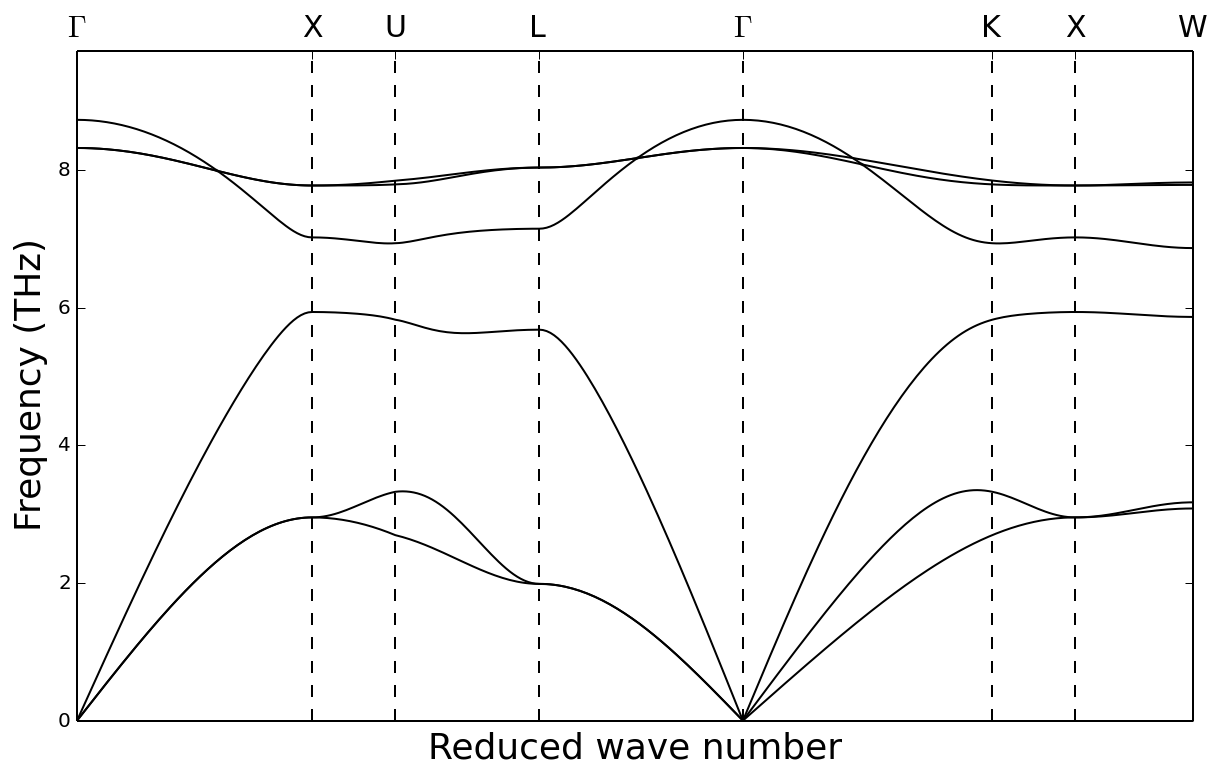

In [7]:
calc.get_ph_disp()
calc.plot(mytup=(point_names,x,X))

We can also calculate the DOS of this material easily.

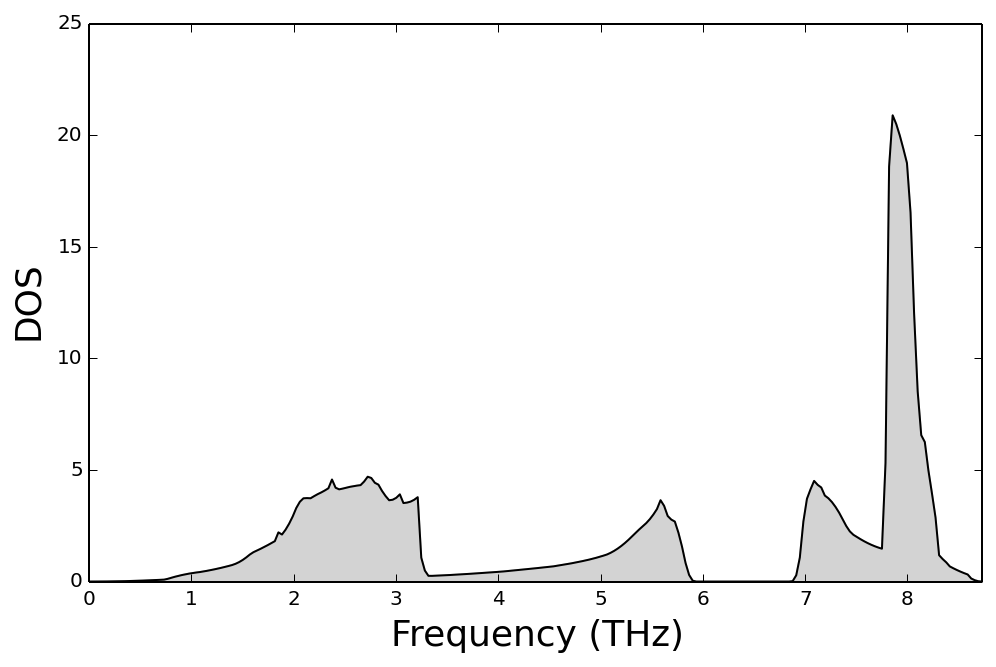

In [8]:
calc.get_dos(kgrid=(8,8,8))
calc.plot_dos()

Likewise, we could calculate the specific heat and the thermal conductivity. tau in "get_therm_cond" is the mean phonon lifetime $\tau$ in nanosecond. alat is the lattice constant $a_0$ of GaAs.

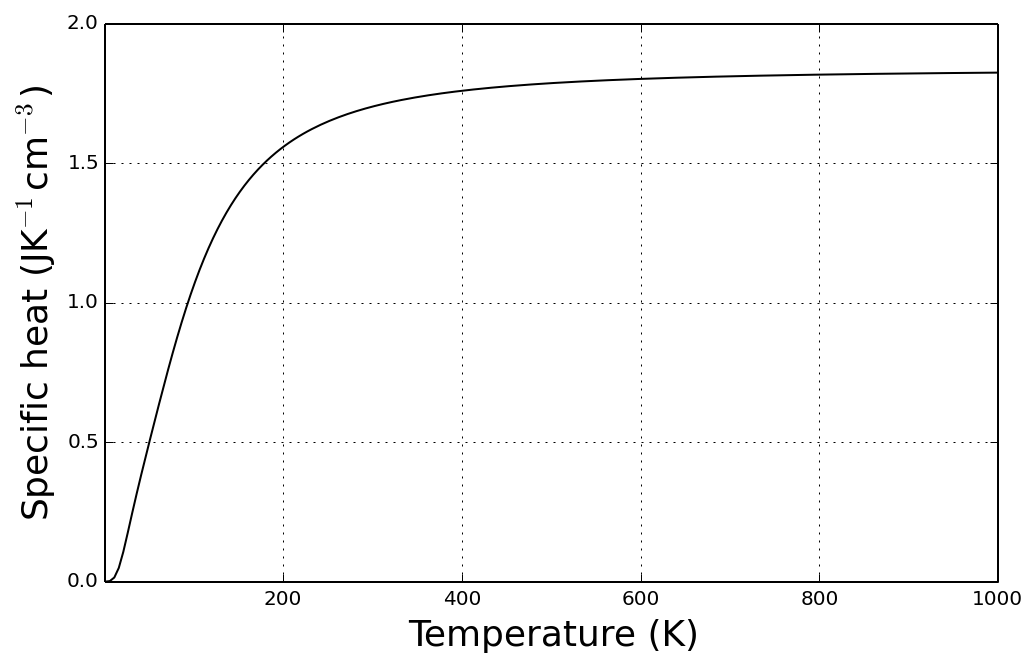

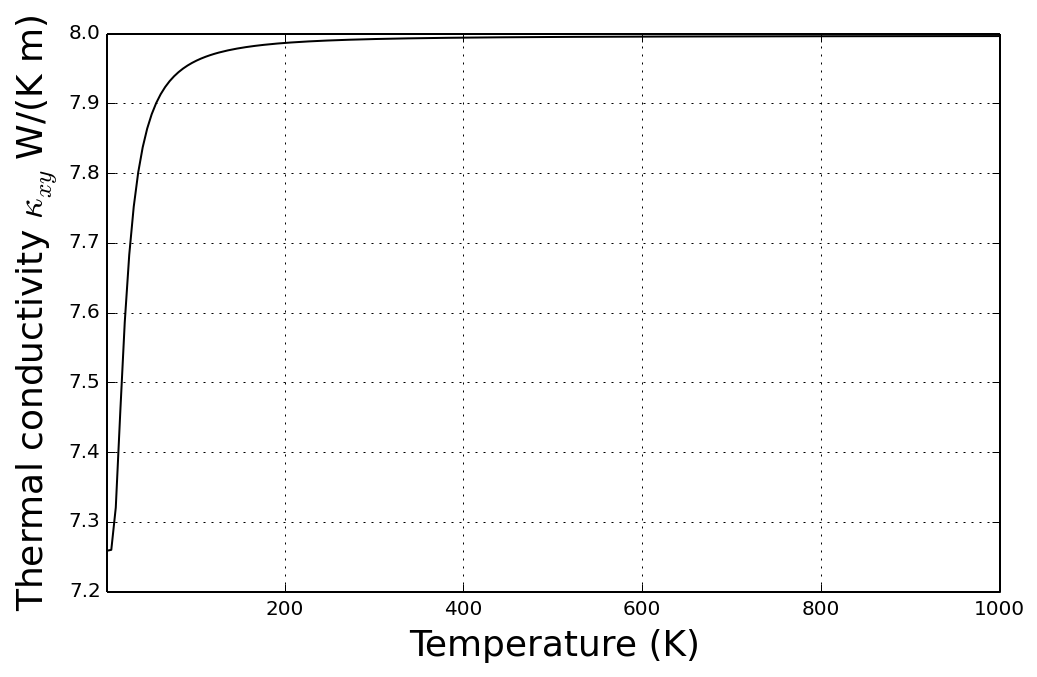

In [10]:
temp = np.linspace(1.,1000,200)
calc.get_debye(temp,alat=5.65,kgrid=(4,4,4))
calc.get_therm_cond(temp,alat=5.65,tau=50.,x="x",y="y",kgrid=(4,4,4),koff=(0,0,0))